<a href="https://colab.research.google.com/github/mugobrian201/portfolio/blob/main/Air_Quality_in_Beijing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Beijing Air Quality Analysis Project**

I have successfully downloaded and combined air quality data from 12 different monitoring stations across Beijing, China. The dataset contains measurements taken from 1st March 2013 to 28th February 2017 which is exactly 4 years of detailed environmental data. I accessed the data from Kaggle.The data includes:

    Air pollutants: PM2.5, PM10, SO2, NO2, CO, O3

    Weather conditions: Temperature, pressure, dew point, rain, wind direction, wind speed

    Time information: Year, month, day, hour

    Location data: 12 different monitoring stations across Beijing

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sid321axn/beijing-multisite-airquality-data-set")

print("Path to dataset files:", path)

100%|██████████| 8.58M/8.58M [00:00<00:00, 65.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sid321axn/beijing-multisite-airquality-data-set/versions/1


In [3]:
import pandas as pd
import os

# Path to the downloaded dataset
path = "/root/.cache/kagglehub/datasets/sid321axn/beijing-multisite-airquality-data-set/versions/1"

# List all files in the directory
print("Files in the dataset:")
for file in os.listdir(path):
    print(f"- {file}")

# Typically, the main data file might be a CSV file
# Look for CSV files specifically
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
print(f"\nCSV files found: {csv_files}")

# Load the first CSV file (or specify the exact file name if you know it)
if csv_files:
    file_path = os.path.join(path, csv_files[0])
    df = pd.read_csv(file_path)
    print(f"\nLoaded {csv_files[0]}")
    print(f"DataFrame shape: {df.shape}")
    print("\nFirst few rows:")
    print(df.head())
else:
    print("No CSV files found. Checking for other file types...")

    # List all files to see what's available
    all_files = os.listdir(path)
    print("All files:", all_files)

Files in the dataset:
- PRSA_Data_Changping_20130301-20170228.csv
- PRSA_Data_Guanyuan_20130301-20170228.csv
- PRSA_Data_Tiantan_20130301-20170228.csv
- PRSA_Data_Wanshouxigong_20130301-20170228.csv
- PRSA_Data_Shunyi_20130301-20170228.csv
- PRSA_Data_Wanliu_20130301-20170228.csv
- PRSA_Data_Dongsi_20130301-20170228.csv
- PRSA_Data_Dingling_20130301-20170228.csv
- PRSA_Data_Gucheng_20130301-20170228.csv
- PRSA_Data_Aotizhongxin_20130301-20170228.csv
- PRSA_Data_Nongzhanguan_20130301-20170228.csv
- PRSA_Data_Huairou_20130301-20170228.csv

CSV files found: ['PRSA_Data_Changping_20130301-20170228.csv', 'PRSA_Data_Guanyuan_20130301-20170228.csv', 'PRSA_Data_Tiantan_20130301-20170228.csv', 'PRSA_Data_Wanshouxigong_20130301-20170228.csv', 'PRSA_Data_Shunyi_20130301-20170228.csv', 'PRSA_Data_Wanliu_20130301-20170228.csv', 'PRSA_Data_Dongsi_20130301-20170228.csv', 'PRSA_Data_Dingling_20130301-20170228.csv', 'PRSA_Data_Gucheng_20130301-20170228.csv', 'PRSA_Data_Aotizhongxin_20130301-20170228.cs

In [4]:

# Path to the downloaded dataset
path = "/root/.cache/kagglehub/datasets/sid321axn/beijing-multisite-airquality-data-set/versions/1"

# Get all CSV files
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

# Method 1: Concatenate all files at once
df_list = []
for file in csv_files:
    file_path = os.path.join(path, file)
    temp_df = pd.read_csv(file_path)
    df_list.append(temp_df)

# Concatenate all DataFrames
df = pd.concat(df_list, ignore_index=True)

print(f"Combined DataFrame shape: {df.shape}")
print("\nFirst few rows of combined data:")
print(df.head())
print(df.info())

Combined DataFrame shape: (420768, 18)

First few rows of combined data:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5   
2   3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0  -3.0   
3   4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0  -3.6   
4   5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM    station  
0  1020.8 -19.7   0.0    E   0.5  Changping  
1  1021.3 -19.0   0.0  ENE   0.7  Changping  
2  1021.3 -19.9   0.0  ENE   0.2  Changping  
3  1021.8 -19.1   0.0  NNE   1.0  Changping  
4  1022.3 -19.4   0.0    N   2.1  Changping  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  

IMPORT THE NECESSARY LIBRARIES

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import pytz  # For timezone handling
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

# **Predicting Daily PM2.5 Air Quality Levels in Beijing Using Linear Regression: A Time Series Approach**

Air pollution, particularly fine particulate matter (PM2.5), poses significant health and environmental risks in urban areas like Beijing. This study analyzes a multi-site dataset spanning March 2013 to February 2017, comprising hourly measurements of PM2.5 and meteorological variables from 12 monitoring stations. The primary objective is to develop a predictive model for daily average PM2.5 concentrations using linear regression as an initial baseline approach.

Data preprocessing involved concatenating station-specific CSV files, converting timestamps to a timezone-aware index (Asia/Shanghai), resampling to daily means with forward-filling for missing values, and removing extreme outliers (>350 μg/m³) to mitigate skew while preserving key pollution events. Exploratory data analysis revealed a mean PM2.5 of approximately 77.56 μg/m³, with positive autocorrelation (correlation coefficient 0.55) between consecutive days, justifying the inclusion of a lag-1 feature (previous day's PM2.5 average) as the sole predictor.

The dataset was split chronologically into training (80%) and testing (20%) sets to respect time series structure. A linear regression model was fitted, yielding the equation: PM2.5 = 34.51 + 0.56 × (Previous Day's PM2.5). Performance was evaluated using mean absolute error (MAE), with the model achieving a training MAE of 38.02 μg/m³ and a test MAE of 37.88 μg/m³, outperforming a naive baseline (mean prediction MAE of 46.45 μg/m³).

Visualizations, including time series plots and autocorrelation scatterplots, highlighted seasonal pollution trends and the lag feature's predictive value. While linear regression provides a simple, interpretable benchmark, limitations include its assumption of linearity and independence, which may overlook complex temporal dynamics. Future extensions will incorporate autoregressive (AR) and autoregressive moving average (ARMA) models to enhance forecasting accuracy.

Localizing the Timezone

In [6]:
# Create datetime index
datetime_index = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df = df.set_index(datetime_index)
#Localize Timezone
df.index = df.index.tz_localize("UTC").tz_convert("Asia/Shanghai")
#Drop unnecessary columns
df.drop(columns = ["No", "year", "month", "day", "hour"], inplace=True)

DATA EXPLORATION

count    412029.000000
mean         79.793428
std          80.822391
min           2.000000
25%          20.000000
50%          55.000000
75%         111.000000
max         999.000000
Name: PM2.5, dtype: float64


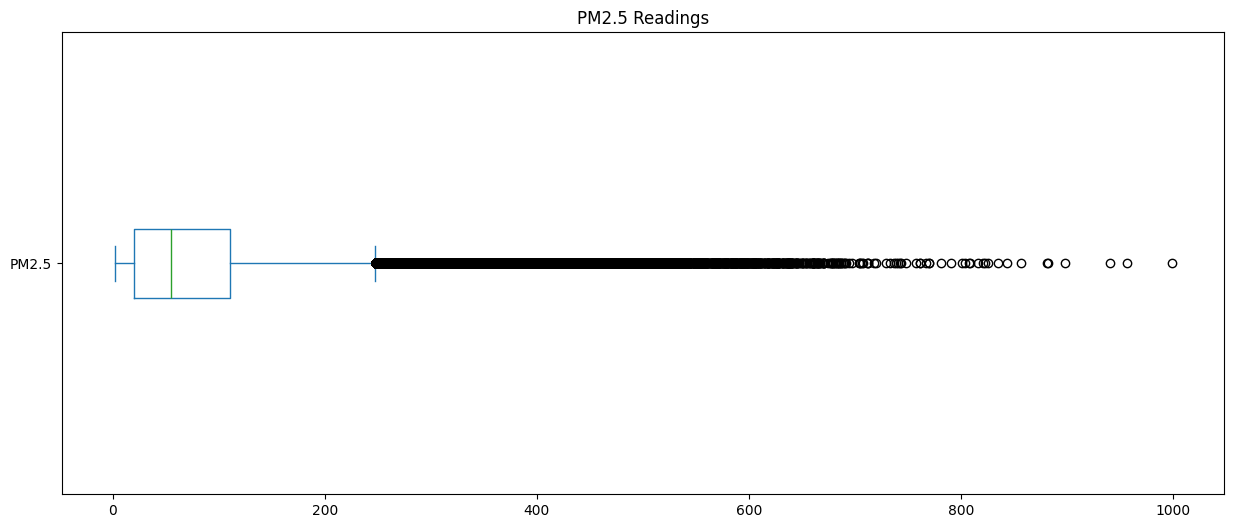

In [7]:
#Summary statistics of 'PM2.5' Readings
print(df["PM2.5"].describe())
fig, ax = plt.subplots(figsize=(15, 6))
df["PM2.5"].plot(kind="box", vert=False, title="PM2.5 Readings", ax=ax)
plt.show()


From my boxplot, there are many outliers. It would be advisable to remove readings above 350 ug/m3

Note:
    Good: 0-12 μg/m³

    Moderate: 12-35 μg/m³

    Unhealthy: 35-150 μg/m³

    Hazardous: 150+ μg/m³

These outliers represent severe pollution events that are important for environmental analysis but may skew statistical models.

In [8]:
#Remove outliers >350 ug/m3
#Read only "PM2.5" Readings < 350ug/m3
df = df[df["PM2.5"]< 350]

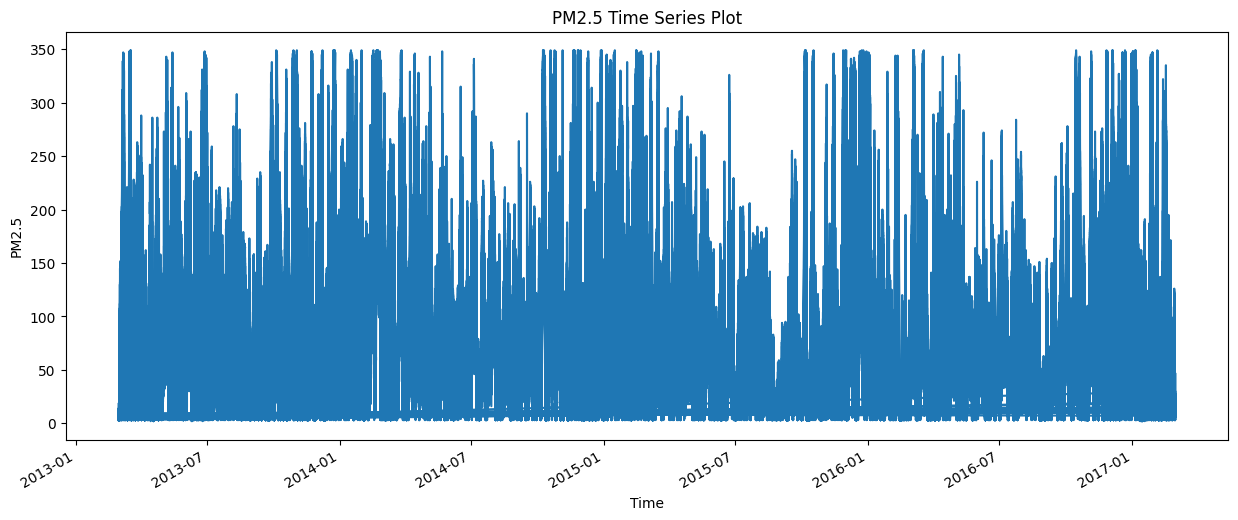

In [9]:
#Time Series Plot of 'PM2.5' Readings
fig, ax = plt.subplots(figsize=(15, 6))
df["PM2.5"].plot(xlabel="Time", ylabel="PM2.5", title="PM2.5 Time Series Plot", ax=ax)
plt.show();

As seen, it is difficult to do an interepretation of my time series visualization.

I need to Resample my dataframe to provide the mean of 'PM2.5' Readings for each day.

I will predict the PM2.5 Readings for each day and use forward fill to impute any NaN(missing values).

In [10]:
#Resample my Time Series Data
#Use forward fill to fill any NaN
df = df["PM2.5"].resample("D").mean().fillna(method="ffill").to_frame()

It will be difficult to analyze using a time series plot, that is, increase or decrease trend in air pollution, monthly or seasonal trend of Air Pollution.

A Rolling Average Plot is recommendable(Mean value of multiple subsets of numbers in a dataset) It will show the average of the previous 168 hours (7 days) of PM2.5 readings

In [11]:
df.head()

,PM2.5
2013-03-01 00:00:00+08:00,5.802083
2013-03-02 00:00:00+08:00,13.218750
2013-03-03 00:00:00+08:00,80.666667
2013-03-04 00:00:00+08:00,30.232639
2013-03-05 00:00:00+08:00,82.142322


<Axes: title={'center': 'Weekly Rolling Average'}, ylabel='PM2.5'>

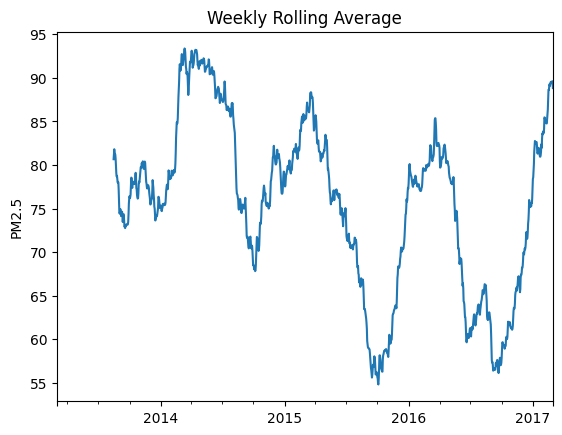

In [12]:
#Calculating Rolling Averages and plotting it
df["PM2.5"].rolling(168).mean().plot(ylabel="PM2.5", title = "Weekly Rolling Average")

From the plot we can see the following;

 Upward slopes indicating pollution is building up

 Downward slopes showing that Air quality is improving

 Flat periods show stable pollution levels

 Sharp peaks also showing sudden pollution events

My goal is to create a Model that will have features that will help me predict 'PM2.5' readings, which is my target vector.

I want to create a lag feature('PM2.5.L1'), a new column that will contain the mean 'PM2.5' from the previous day. It will help me predict 'PM2.5' Readings.

I need to note that this new feature will produce NaN that I need to drop.

In [13]:
df.head()

,PM2.5
2013-03-01 00:00:00+08:00,5.802083
2013-03-02 00:00:00+08:00,13.218750
2013-03-03 00:00:00+08:00,80.666667
2013-03-04 00:00:00+08:00,30.232639
2013-03-05 00:00:00+08:00,82.142322


In [14]:
#Create a new column (lag feature)
df["P2.L1"] = df["PM2.5"].shift(1)
df.dropna(inplace = True)

After creating a new column, I want to check the Autocorrelation btw 'PM2.5' and 'P2.L1'

Autocorrelation will be the relationship between the readings of today and what happened the day before.

I will check the correlation and also plot the relationahip using a scatter plot and line plot.

         PM2.5    P2.L1
PM2.5  1.00000  0.55322
P2.L1  0.55322  1.00000


Text(0.5, 1.0, 'PM2.5 Autocorrelation')

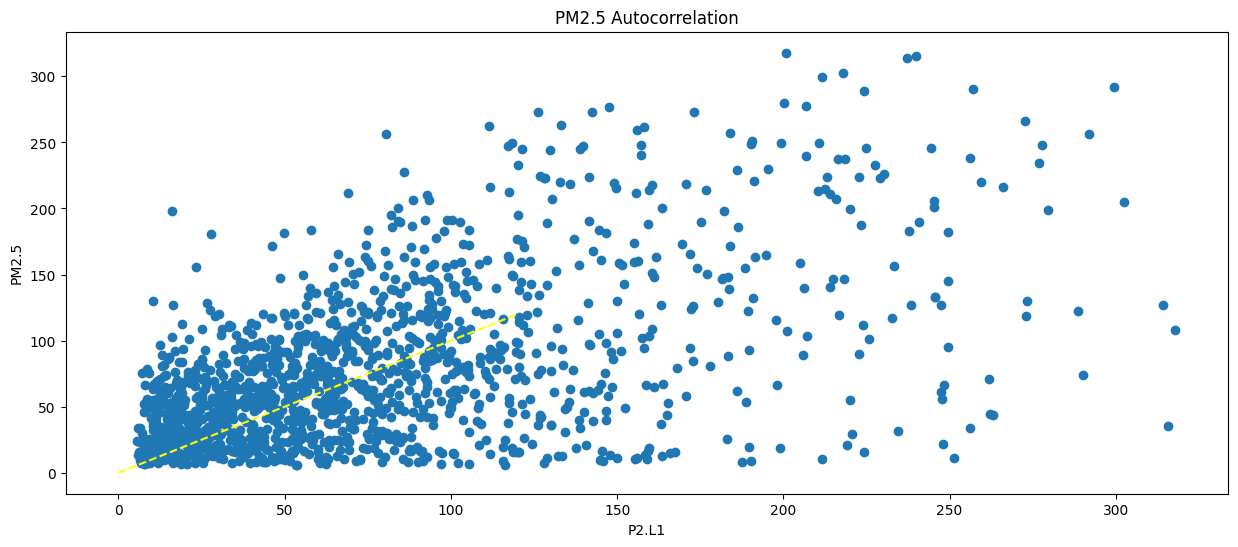

In [15]:
#Autocorrelation
print(df.corr())
#Autocorrelation Plot
fig, ax = plt.subplots(figsize=(15,6))
ax.scatter(x=df["P2.L1"], y=df["PM2.5"])
ax.plot([0,120], [0,120], linestyle = "--", color="yellow")
plt.xlabel("P2.L1")
plt.ylabel("PM2.5")
plt.title("PM2.5 Autocorrelation")

The dense clustering of points around the lower left (that is, 0 to 150 on both axes) suggests that lower PM2.5 readings tend to follow lower readings from the previous day, which is common in air quality data due to stable atmospheric conditions.

There’s a spread of points extending to higher values (up to 300), indicating occasional higher PM2.5 levels, potentially due to pollution spikes or weather changes.

There is a strong correlation between the two features which suggests that a lag-1 feature will be a useful predictor.

The plot confirms that PM2.5 readings show a positive autocorrelation at a 1-day lag. This means the current day's PM2.5 level is somewhat predictive of the next day's level, supporting the use of a lag feature in modeling.

I want to now split between the Feature Matrix(X) and Target Vector(y). I also want to use train-test split for time series to split X and y to training and test sets. 80% of my data will be used for training and 20% for testing.

I also need to note that my training set MUST come before the test set.

Split   feature matrix(X) and target vector(y)

In [16]:
target = "PM2.5"
y = df[target]
print(y.shape)
X = df.drop(columns=target)
print(X.shape)

(1461,)
(1461, 1)


In [17]:
#Dividing my feature matrix and target vector
#Take every row from the start of my dataframe up to but not including the cutoff row
cutoff = int(len(X)*0.8)
X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
print(X_train.shape, y_train.shape)
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]
print(X_test.shape, y_test.shape)

(1168, 1) (1168,)
(293, 1) (293,)


BUILD MODEL

Baseline

In [18]:
y_mean = y_train.mean()
print("Mean:", round(y_mean, 2))
y_pred_baseline = [y_mean] * len(y_train)
print("Baseline:", y_pred_baseline[:5])
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("mae_baseline:", round(mae_baseline, 2))

Mean: 77.56
Baseline: [np.float64(77.5607472032176), np.float64(77.5607472032176), np.float64(77.5607472032176), np.float64(77.5607472032176), np.float64(77.5607472032176)]
mae_baseline: 46.45


Iterate

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred_training = model.predict(X_train)
print("Training:", y_pred_training)
mae_training = mean_absolute_error(y_train, y_pred_training)
print("mae training:", mae_training)
test_mae = mean_absolute_error(y_test, model.predict(X_test))
print("test mae:", test_mae)

Training: [37.72992988 41.85071058 79.32550697 ... 58.2175662  51.87923289
 95.00521122]
mae training: 38.022621334507825
test mae: 37.88414608484889


Both my training and test data have beat the Baseline.

My LinearRegression Model also shows that it generalizes well with new data.

COMMUNICATE RESULTS

In [21]:
#Extract Intercept
intercept = model.intercept_.round(2)
coefficient = model.coef_.round(2)
print(f"PM2.5 = {intercept} + ({coefficient}*P2.L1)")

PM2.5 = 34.51 + ([0.56]*P2.L1)



I want to create a DataFrame with two columns, 'y_test' which will contain my actual values and 'y_pred_test' which will contain my model's predictions

In [22]:
df_pred_test = pd.DataFrame(
    {
        "y_test" : y_test,
        "y_pred_test" : model.predict(X_test)
    }
)
df_pred_test.head()

,y_test,y_pred_test
2016-05-13 00:00:00+08:00,27.293286,83.372006
2016-05-14 00:00:00+08:00,34.210526,49.670676
2016-05-15 00:00:00+08:00,43.122378,53.513970
2016-05-16 00:00:00+08:00,23.219512,58.465491
2016-05-17 00:00:00+08:00,42.939929,47.407243


In [23]:
#Plot Time Series Predictions
fig = px.line(df_pred_test, labels = {"value":"PM2.5"})
fig.show()

The two lines track closely, with predictions smoothing out some volatility in actuals e.g., underestimating peaks (>150 μg/m³) but capturing trends accurately in moderate ranges.

Overall, the overlap demonstrates good fit, especially for stable periods, but highlights room for improvement in extremes


# **Predicting Daily PM2.5 Air Quality Levels in Beijing Using AutoRegressive(AR) Models: A Time Series Approach**


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2013-03-02 00:00:00+08:00 to 2017-03-01 00:00:00+08:00
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   1461 non-null   float64
 1   P2.L1   1461 non-null   float64
dtypes: float64(2)
memory usage: 34.2 KB


EXPLORE

Plotting both an ACF and PACF plot,  
An ACF plot is a good visual representation of an autocorrelation function and how they change over time.
This plot will help know how many lags are required for my model to have good predictive power.

A PACF plot is a good visual representation of the direct observations only.
This plot will help see the direct observations and should be eliminated because they are not of help.

Text(0, 0.5, 'Correlation Coefficient')

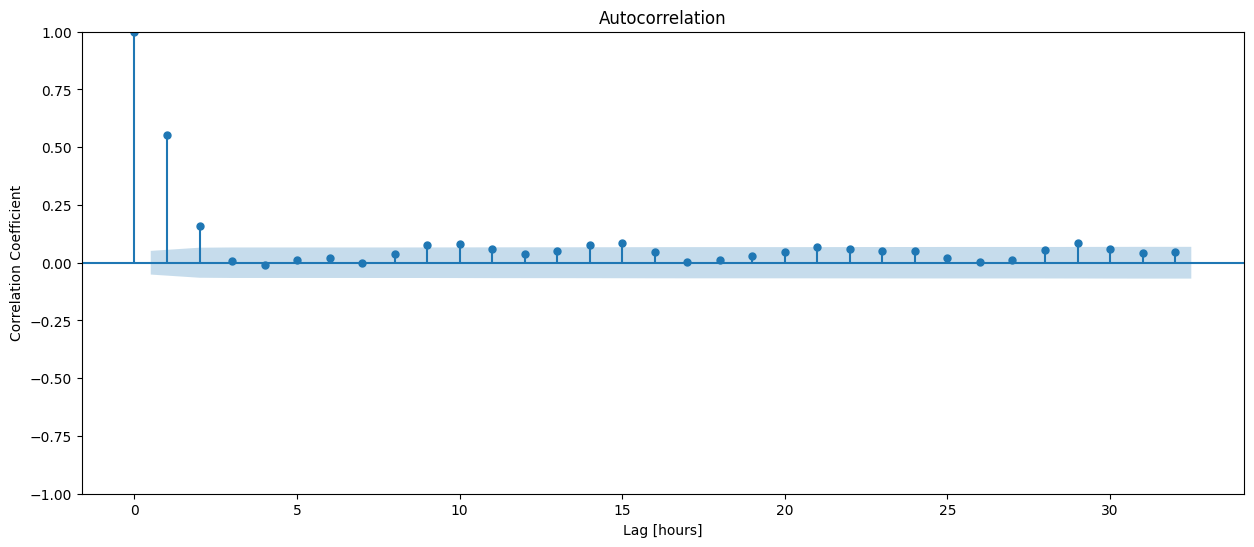

In [32]:
#Plot ACF
fig, ax = plt.subplots(figsize=(15,6))
plot_acf(df["PM2.5"], ax=ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient")

Text(0, 0.5, 'Correlation Coefficient')

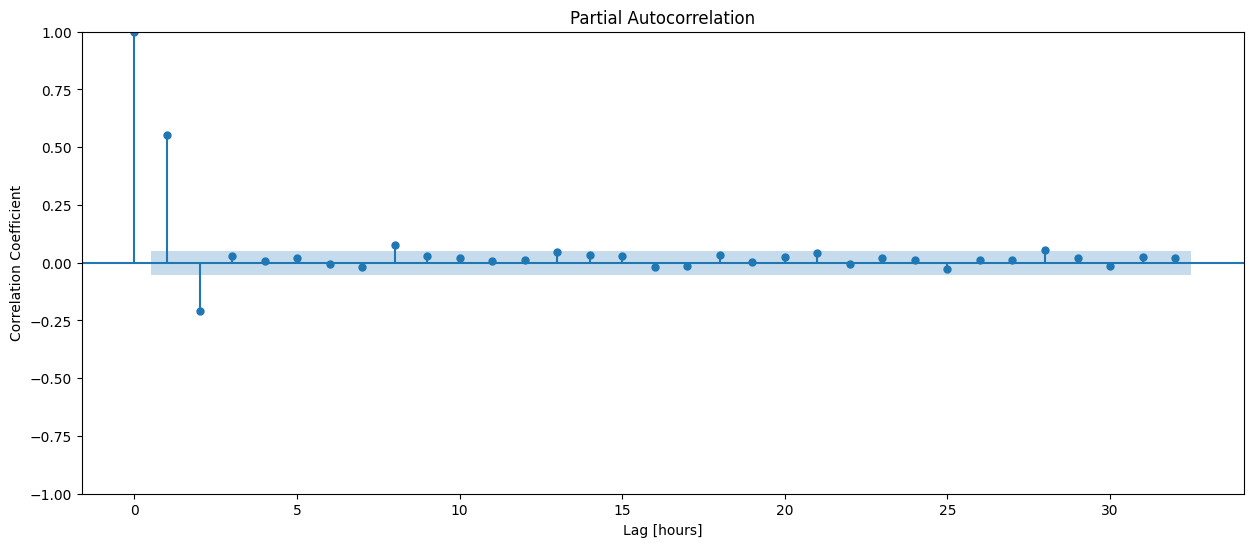

In [33]:
#Plot PACF
fig, ax = plt.subplots(figsize=(15,6))
plot_pacf(df["PM2.5"], ax=ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient")

From both diagrams, we can see bars at each lag where the height of each bar represents the correlation coefficient of each lag.

If a bar extends beyond the significance bounds, it indicates significant autocorrelation at that lag.

I am using the PACF plot so as to know the number of lags I will use to instantiate my AR Model. From my plot, it is clear that lags 1 and 2 show significant spikes indicating that these lags are important for modelling.

SPLIT

Train-test split

Here, there is no vertical split, only horizontal split.

95% of my data will be training test and 5% of my data will be test set to bring into line with statsmodel Confidence Interval.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2013-03-02 00:00:00+08:00 to 2017-03-01 00:00:00+08:00
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   1461 non-null   float64
 1   P2.L1   1461 non-null   float64
dtypes: float64(2)
memory usage: 34.2 KB


In [41]:
cutoff_test = int(len(df["PM2.5"]) * 0.95)
print(cutoff_test)
y_train_ar = df["PM2.5"].iloc[: cutoff_test]
print(y_train_ar.shape)
y_test_ar = df["PM2.5"].iloc[cutoff_test :]
print(y_test_ar.shape)

1387
(1387,)
(74,)


BUILD MODEL

Baseline

In [44]:
y_mean_ar = y_train_ar.mean()
print("Mean:", y_mean_ar)
y_pred_baseline_ar = [y_mean_ar] * len(y_train_ar)
print("Baseline:", y_pred_baseline_ar[:5])
mae_baseline_ar = mean_absolute_error(y_train_ar, y_pred_baseline_ar)
print("mae_baseline:", round(mae_baseline_ar, 2))

Mean: 76.03166763193752
Baseline: [np.float64(76.03166763193752), np.float64(76.03166763193752), np.float64(76.03166763193752), np.float64(76.03166763193752), np.float64(76.03166763193752)]
mae_baseline: 45.1


Iterate

I need to instantiate my AR Model and fit it to the training data(*y_train_ar*). I also need to set my lags argument to 2.

An AR Model is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time steps.

Also,this model does not have a feature matrix, only a Target Vector

In [47]:
#Instantiate my model
model_ar = AutoReg(y_train_ar, lags=2).fit()

Training Prediction

There will be NaN Values which need to be dropped first, then begin predicting from the second row of my y_train_ar

In [52]:
model_ar.predict().isnull().sum()
y_pred_training_ar = model_ar.predict().dropna()
print("Training:", y_pred_training_ar[:5])
training_mae_ar = mean_absolute_error(y_train_ar.iloc[2:], y_pred_training_ar)
print("Training mae:", training_mae_ar)

Training: 2013-03-04 00:00:00+08:00     94.180614
2013-03-05 00:00:00+08:00     43.381738
2013-03-06 00:00:00+08:00     91.158715
2013-03-07 00:00:00+08:00    150.428536
2013-03-08 00:00:00+08:00    155.527058
Freq: D, dtype: float64
Training mae: 35.846365139972285


My AR Model has successfully beat the baseline

Calculating Residuals

Residuals

When performing any type of Regression Analysis, we end up with a line of best fit. Because our data comes from the real world, it tends to be messy so the data points do not fall exactly on this line, they are scattered around it and a residual is the vertical distance between each individual data point and the regression line. Each data point has only one residual which can be positive if above the regression line and vice versa, or 0 if the line directly passes through the data point.  that is, (True value - Predicted Value)

In [55]:
 #Calculating Residuals
 y_train_ar_resid = model_ar.resid
 y_train_ar_resid.tail()

,0
2016-12-13 00:00:00+08:00,-45.029853
2016-12-14 00:00:00+08:00,-56.744614
2016-12-15 00:00:00+08:00,13.605541
2016-12-16 00:00:00+08:00,-8.466160
2016-12-17 00:00:00+08:00,78.717615


<Axes: ylabel='Residual Value'>

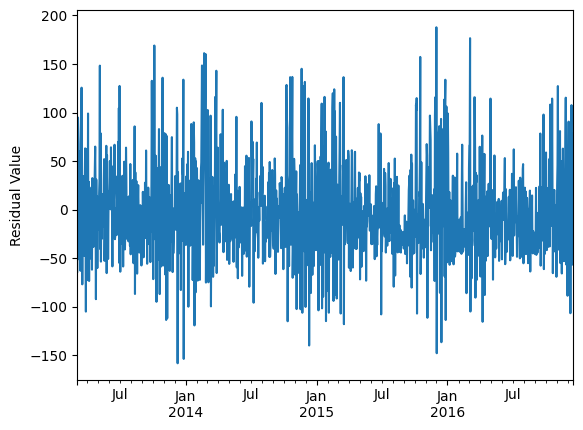

In [57]:
 #Residual : Time Series
 y_train_ar_resid.plot(ylabel="Residual Value")

Text(0.5, 1.0, 'AR(2), Dist of Residuals')

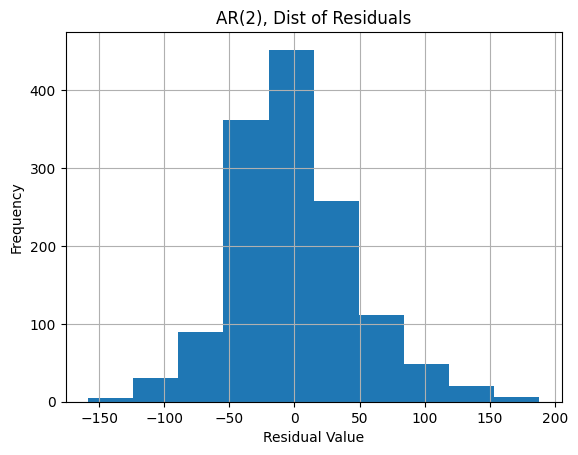

In [59]:
#Histogram of y_train_resid_ar
y_train_ar_resid.hist()
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.title("AR(2), Dist of Residuals")

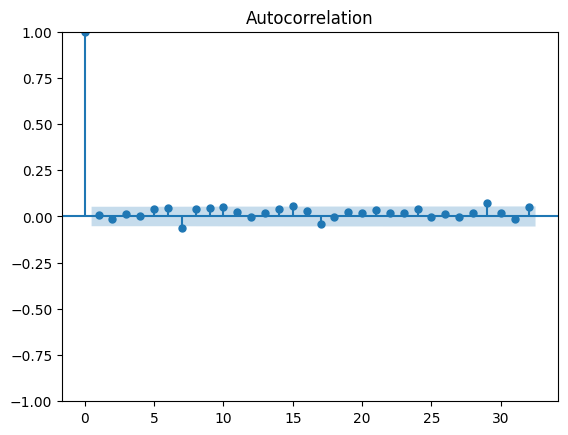

In [62]:
#Plot ACF Plot of Residuals
plot_acf(y_train_ar_resid);

It is difficult to interprete the Time Series of Residuals.

But its histogram shows a Normal Distribution of Residuals, around a zero mean.

With the ACF Plot, the height of the bars do not go beyond the significant bounds. We do not want any correlation happening in the residuals and my AR Model removed all predictive power during training.

EVALUATE MODEL

In [68]:
#timestamp for the first index
print("min:", y_test_ar.index.min())
print("max:", y_test_ar.index.max())
#prediction test
y_pred_test_ar = model_ar.predict(y_test_ar.index.min(),y_test_ar.index.max())
print("Prediction:", y_pred_test_ar[:5])
mae_test_ar = mean_absolute_error(y_test_ar, y_pred_test_ar)
print("Mae test:", mae_test_ar)

min: 2016-12-18 00:00:00+08:00
max: 2017-03-01 00:00:00+08:00
Prediction: 2016-12-18 00:00:00+08:00    131.758862
2016-12-19 00:00:00+08:00     97.006121
2016-12-20 00:00:00+08:00     77.304624
2016-12-21 00:00:00+08:00     71.967897
2016-12-22 00:00:00+08:00     72.964931
Freq: D, dtype: float64
Mae test: 63.439210930346505


I want to create a DataFrame with two columns, 'y_test_ar' which will contain my actual values and 'y_pred_test_ar' which will contain my model's predictions

In [70]:
df_pred_test_ar = pd.DataFrame(
    {
        "y_test_ar" : y_test_ar,
        "y_pred_test_ar" : y_pred_test_ar
    },
        index = y_test_ar.index
)
df_pred_test_ar.head()

,y_test_ar,y_pred_test_ar
2016-12-18 00:00:00+08:00,215.704280,131.758862
2016-12-19 00:00:00+08:00,206.829268,97.006121
2016-12-20 00:00:00+08:00,239.919540,77.304624
2016-12-21 00:00:00+08:00,315.753623,71.967897
2016-12-22 00:00:00+08:00,34.987578,72.964931


In [71]:
#Time Series plot for values in test predictions
fig = px.line(df_pred_test_ar, labels = {"value" : "PM2.5"})
fig.show()

This is not a good plot. Traditional test evaluation does not work when working with a Time Series Model

Walk Forward Validation(wfv)

Validation is evaluating how well a model performs on unseen data, ensuring it can generalize beyond the data it was trained on.

My predictions lose power over time because the model gets further and further away from its beginning. What if I could move that beginning forward with the model? ie. Retrain each model for each new observation in the dataset, dropping the data that is farthest in the plot.

I want to look at the last prediction of the training data, the first row of the test data then an out of sample prediction of the next timestamp.

In [76]:
#last prediction of the training data
history = y_train_ar.copy()
print("history:", history.tail(1))
#First row of test data
model_ar = AutoReg(history, lags=2).fit()
print("forecast:", model_ar.forecast()) #out of sample prediction of the next timestamp

history: 2016-12-17 00:00:00+08:00    149.732639
Freq: D, Name: PM2.5, dtype: float64
forecast: 2016-12-18 00:00:00+08:00    131.758862
Freq: D, dtype: float64


I want to create a Series of my wfv prediction. Then I will train my model on history data and generate a forecast(next timestamp). After that, I will append my forecasts to my pd.Series.

I will also go into my test set, get the next data point at the next timestamp and append to my history, that is, find equivalent test data point that is at the same timestamp.

In [81]:
# Initialize variables
y_pred_wfv_ar = pd.Series(dtype='float64')
history = y_train_ar.copy()

# Walk-forward validation loop
for i in range(len(y_test_ar)):
    model_ar = AutoReg(history, lags=2).fit()
    next_pred_ar = model_ar.forecast()
    # Concatenate the new prediction to y_pred_wfv_ar
    y_pred_wfv_ar = pd.concat([y_pred_wfv_ar, next_pred_ar])
    # Concatenate the actual test data point to history
    history = pd.concat([history, y_test_ar[next_pred_ar.index]])


In [84]:
#Test Evaluation
mae_test_wfv = mean_absolute_error(y_test_ar, y_pred_wfv_ar)
print("wfv_test_mae:", mae_test_ar)
print(model_ar.params)

wfv_test_mae: 63.439210930346505
const       41.621008
PM2.5.L1     0.669920
PM2.5.L2    -0.211557
dtype: float64


In [85]:
df_pred_test_ar_wfv = pd.DataFrame(
    {
        "y_test_ar" : y_test_ar,
        "y_pred_wfv_ar" : y_pred_wfv_ar
    },
        index = y_test_ar.index
)
df_pred_test_ar.head()
#Plot wfv predictions
fig = px.line(df_pred_test_ar_wfv, labels = {"value" : "PM2.5"})
fig.show()
